# Self-knowledge in commentaries on book 3

This notebook contains the quantitative analyses of the doctrinal network for the chapter on book 3.

## Database note

I am using a different schema that enables more detailed analysis of doctrines. 
Using the `(:Instance)` node as a blank node between a `(:Question)` and a `(:Doctrine)` no doctrine is embedded in a fixed structure. It is in stead possible to determine the specific use of a doctrine by any given commentator, and it does not need to be reflected by any others.

# Analysis

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from os import path

from py2neo import Graph
graph = Graph(password="1234")

sns.set_context("paper", font_scale=1.8)

In [2]:
author_names = graph.run('MATCH (n:Author) where not n.name = "Aristotle" RETURN n.name ORDER BY n.name asc').to_data_frame()['n.name']

In [3]:
author_names

0                   Adam Whitby
1               Anonymus Assisi
2                Anonymus Bazan
3             Anonymus Digby 55
4     Anonymus Vat. Lat. 2170 2
5             Henric de la Wyle
6                 John Dinsdale
7                John of Jandun
8               Radulphus Brito
9              Siger of Brabant
10           Simon of Faversham
Name: n.name, dtype: object

## Experimentation with data extraction

In [4]:
def doctrines_of(name):
    q = ("MATCH (q:Question)--(t:Text)--(a:Author {name:'%s'}) "
         "MATCH (q)-[:HAS]->(i:Instance)-->(d:Doctrine) "
         "return distinct d.description " % name)
    return graph.run(q)
doctrines_of('John of Jandun').to_data_frame()

,d.description
0,Self-knowledge by innate species
1,The intellect is self-intelligible
2,Understanding a blocking activity
3,Intellect cannot understand objects of differe...
4,The intellect is intelligible like any other t...
5,Essential self-knowledge results in no self-kn...
6,No simultaneous act and potency
7,Possible intellect completely indeterminate be...
8,Accidents cannot affect their own subject
9,Act and potency with different respects


In [5]:
def list_attacks(name):
    q = ("MATCH (q:Question)--(t:Text)--(a:Author {name:'%s'}) "
         "MATCH (attack:Instance {type:'Attack'})-[:OF]-(ad:Doctrine) "
         "WHERE (q)-[:HAS]->(attack) "
         "return distinct q.title as Question, ad.description as Attack "
         "order by Question "% name)
    return graph.run(q)

In [6]:
def list_refutations(name):
    q = ("MATCH (q:Question)--(t:Text)--(a:Author {name:'%s'}) "
         "MATCH (refut:Doctrine)<-[:OF]-(refi:Instance {type:'Refutation'})-[:ATTACKS]->(ad:Doctrine) "
         "WHERE (refi)<-[:HAS]-(q) "
         "return distinct q.title as Question, refut.description as Refutation, ad.description as Attack "
         "order by Question " % name)
    return graph.run(q)

In [7]:
def list_uncategorized_attacks(name):
    q = ("MATCH (q:Question)--(t:Text)--(a:Author {name:'%s'}) "
         "MATCH (s:Doctrine)<-[:OF]-(i:Instance)-[:ATTACKS]->(ad:Doctrine) "
         "WHERE (i)<-[:HAS]-(q) "
         "AND NOT exists(i.type) "
         "return distinct q.title as Question, s.description as Source, ad.description as Target "
         "order by Question " % name)
    return graph.run(q)

In [8]:
def list_uncategorized_doctrines(name):
    q = ("MATCH (q:Question)--(t:Text)--(a:Author {name:'%s'}) "
         "MATCH (s:Doctrine)<-[:OF]-(i:Instance) "
         "WHERE (i)<-[:HAS]-(q) "
         "AND NOT exists(i.type) or i.type='Conclusion' "
         "return distinct q.title as Question, s.description as Source "
         "order by Question " % name)
    return graph.run(q)
list_uncategorized_doctrines('John of Jandun').to_data_frame()

,Question,Source
0,Whether the possible intellect always understa...,The intellect is intelligible
1,Whether the possible intellect always understa...,The intellect can observe its own activity
2,Whether the possible intellect always understa...,The intellect is self-intelligible
3,Whether the possible intellect always understa...,The intellect knows its own power
4,Whether the possible intellect always understa...,Self-knowledge through external species
5,Whether the possible intellect always understa...,The agent intellect can be understood by the p...
6,Whether the possible intellect always understa...,Agent intellect most suitable object of knowledge
7,Whether the possible intellect always understa...,Agent intellect known through its products
8,Whether the possible intellect always understa...,Possible and agent intellect joined in constan...
9,Whether the possible intellect always understa...,Perpetual self-knowledge of agent intellect no...


In [9]:
list_uncategorized_attacks('Simon of Faversham').to_data_frame()

""


### Attacks

In [10]:
list_attacks('John of Jandun').to_data_frame()

,Attack,Question
0,All knowledge must be based on sense perception,Whether the possible intellect always understa...
1,Analogy with sense and sensation,Whether the possible intellect can know itself
2,Intellect not available to sense perception,Whether the possible intellect can know itself
3,No simultaneous act and potency,Whether the possible intellect can know itself
4,Mover and moved,Whether the possible intellect can know itself
5,Nothing can move itself (knowledge is being-mo...,Whether the possible intellect can know itself
6,All intelligibles become intellects if intelle...,Whether the possible intellect can know itself
7,Other objects of knowledge have no self-knowledge,Whether the possible intellect can know itself
8,Analogy with sense and sensation,Whether the possible intellect can understand ...
9,Intellect not available to sense perception,Whether the possible intellect can understand ...


In [11]:
list_attacks('Radulphus Brito').to_data_frame()

,Attack,Question
0,No abstraction of the intellect,Whether our possible intellect can understand ...
1,All knowledge must be based on sense perception,Whether our possible intellect can understand ...
2,Power of agent intellect not intelligible,Whether our possible intellect can understand ...
3,Knowing agent intellect means knowing all phan...,Whether our possible intellect can understand ...
4,Analogy with sense and sensation,Whether the intellect can know its act and pow...
5,Intellect not its own proper object of knowledge,Whether the intellect can know its act and pow...
6,Intellect not available to sense perception,Whether the intellect can know its act and pow...
7,Knowing the act of the intellect risks infinit...,Whether the intellect can know its act and pow...
8,Mover and moved,Whether the intellect is intelligible
9,Intellect not available to sense perception,Whether the intellect is intelligible


In [12]:
list_attacks('Anonymus Bazan').to_data_frame()

,Attack,Question
0,No abstraction of the intellect,Whether our possible intellect can understand ...
1,All knowledge must be based on sense perception,Whether our possible intellect can understand ...
2,Agent intellect has no positive content,Whether our possible intellect can understand ...
3,Intellect not its own proper object of knowledge,Whether the intellect can understand the act o...
4,Intellect not available to sense perception,Whether the intellect can understand the act o...
5,Analogy with sense and sensation,Whether the intellect can understand the act o...
6,Intellect not available to sense perception,Whether the possible intellect is intelligible
7,Mover and moved,Whether the possible intellect is intelligible


In [13]:
list_refutations('Anonymus Bazan').to_data_frame()[['Refutation', 'Attack', 'Question']]

,Refutation,Attack,Question
0,Primary and secondary intelligibility,No abstraction of the intellect,Whether our possible intellect can understand ...
1,Primary and secondary intelligibility,All knowledge must be based on sense perception,Whether our possible intellect can understand ...
2,Intellect is perceptible after actualization,Intellect not available to sense perception,Whether the intellect can understand the act o...
3,Primary and secondary intelligibility,Intellect not its own proper object of knowledge,Whether the intellect can understand the act o...
4,Sense cannot perceive own action because of th...,Analogy with sense and sensation,Whether the intellect can understand the act o...
5,Intellect is perceptible after actualization,Intellect not available to sense perception,Whether the possible intellect is intelligible
6,Only restriction of identity in physical movement,Mover and moved,Whether the possible intellect is intelligible


In [14]:
list_refutations('Radulphus Brito').to_data_frame()[['Refutation', 'Attack', 'Question']]

,Refutation,Attack,Question
0,Primary and secondary intelligibility,No abstraction of the intellect,Whether our possible intellect can understand ...
1,Primary and secondary intelligibility,All knowledge must be based on sense perception,Whether our possible intellect can understand ...
2,Knowing a power does not mean knowing its prod...,Power of agent intellect not intelligible,Whether our possible intellect can understand ...
3,Knowing a power does not mean knowing its prod...,Knowing agent intellect means knowing all phan...,Whether our possible intellect can understand ...
4,Primary and secondary intelligibility,Intellect not available to sense perception,Whether the intellect can know its act and pow...
5,Primary and secondary intelligibility,Intellect not its own proper object of knowledge,Whether the intellect can know its act and pow...
6,Sense cannot perceive own action because of th...,Analogy with sense and sensation,Whether the intellect can know its act and pow...
7,Infinite regress not a problem in the intellect,Knowing the act of the intellect risks infinit...,Whether the intellect can know its act and pow...
8,Primary and secondary intelligibility,Intellect not available to sense perception,Whether the intellect is intelligible
9,Only restriction of identity in physical movement,Mover and moved,Whether the intellect is intelligible


In [15]:
list_refutations('John of Jandun').to_data_frame()[['Refutation', 'Attack', 'Question']]

,Refutation,Attack,Question
0,The intellect can understand completely immate...,All knowledge must be based on sense perception,Whether the possible intellect always understa...
1,Primary and secondary intelligibility,Intellect not available to sense perception,Whether the possible intellect can know itself
2,Sense cannot perceive own action because of th...,Analogy with sense and sensation,Whether the possible intellect can know itself
3,Primary and secondary intelligibility,Mover and moved,Whether the possible intellect can know itself
4,Act and potency with different respects,No simultaneous act and potency,Whether the possible intellect can know itself
5,Primary and secondary intelligibility,Nothing can move itself (knowledge is being-mo...,Whether the possible intellect can know itself
6,Self-intelligible through external species,All intelligibles become intellects if intelle...,Whether the possible intellect can know itself
7,An immaterial substance is self-reflexive,Other objects of knowledge have no self-knowledge,Whether the possible intellect can know itself
8,Primary and secondary intelligibility,Intellect not available to sense perception,Whether the possible intellect can understand ...
9,Sense cannot perceive own action because of th...,Analogy with sense and sensation,Whether the possible intellect can understand ...


## Summary data for all doctrines

### General quantities

In [66]:
# Number of doctrines
q = ("MATCH (d:Doctrine) RETURN count(d)")
total_doctrines = graph.run(q).evaluate()

# Number of instances
q = ("MATCH (i:Instance) RETURN count(i)")
total_instances = graph.run(q).evaluate()

# Number of conclusion doctrines
q = ("MATCH (i:Instance {type:'Conclusion'})-[:OF]->(d:Doctrine) "
     "RETURN count(distinct d)")
conclusion_doctrines = graph.run(q).evaluate()

# Number of conclusion instances
q = ("MATCH (i:Instance {type:'Conclusion'}) RETURN count(i)")
conclusion_instances =  graph.run(q).evaluate()

# Number of positive doctrines (doctrines with instances that are not in a rationes context)
q = ("MATCH (i:Instance)--(d:Doctrine) "
     "WHERE not exists(i.type) or i.type = 'Conclusion' "
     "RETURN count(distinct d)")
positive_doctrines =  graph.run(q).evaluate()

# Number of instances of positive doctrines
q = ("MATCH (i:Instance)--(d:Doctrine) "
     "WHERE not exists(i.type) or i.type = 'Conclusion' "
     "RETURN count(distinct i)")
positive_instances =  graph.run(q).evaluate()

# Number of attacks doctrines
q = ("MATCH (i:Instance {type:'Attack'})-[:OF]->(d:Doctrine) "
     "RETURN count(distinct d)")
attack_doctrines = graph.run(q).evaluate()

# Number of attack instances
q = ("MATCH (i:Instance {type:'Attack'}) "
     "RETURN count(i)")
attack_instances = graph.run(q).evaluate()

# Number of refutation doctrines
q = ("MATCH (i:Instance {type:'Refutation'})-[:OF]->(d:Doctrine) "
     "RETURN count(distinct d)")
refutation_doctrines = graph.run(q).evaluate()

# Number of refutation instances
q = ("MATCH (i:Instance {type:'Refutation'}) "
     "RETURN count(i)")
refutation_instances = graph.run(q).evaluate()

In [71]:
quantities = {
    'All': [total_doctrines, total_instances, round(total_doctrines / total_instances, 2)],
    'Determination': [positive_doctrines, positive_instances, round(positive_doctrines / positive_instances, 2)],
    # 'Conclusions': [conclusion_doctrines, conclusion_instances, round(conclusion_doctrines / conclusion_instances, 2)],
    'Attacks': [attack_doctrines, attack_instances, round(attack_doctrines / attack_instances, 2)],
    'Refutations': [refutation_doctrines, refutation_instances, round(refutation_doctrines / refutation_instances, 2)]
}
data = pd.DataFrame(quantities)
data.index = ['Doctrines', 'Instances', 'Proportion']
sum_table = data[['Determination', 'Attacks', 'Refutations', 'All']].T
sum_table[['Doctrines', 'Instances']] = sum_table[['Doctrines', 'Instances']].astype(int)
sum_table

,Doctrines,Instances,Proportion
Determination,33,90,0.37
Attacks,28,61,0.46
Refutations,23,54,0.43
All,73,205,0.36


In [72]:
print(sum_table.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Doctrines &  Instances &  Proportion \\
\midrule
Determination &         33 &         90 &        0.37 \\
Attacks       &         28 &         61 &        0.46 \\
Refutations   &         23 &         54 &        0.43 \\
All           &         73 &        205 &        0.36 \\
\bottomrule
\end{tabular}



Notice that the "All" column is not the sum of the other columns, as one doctrine can easily be used for both attacking, refutating and as a general positive instance. The instance number is however identical with the sum of the columns "Positive", "Attacks", and "Refutations" (but not "Conclusions" as conclusions are examples of positive doctrine instances).

In [32]:
# Doctrine count distributions
distributions = graph.run("match (a:Author)--(:Text)--(:Question)--(:Instance)--(d:Doctrine) "
                          "return count(distinct d) as cnt, a.name order by cnt desc").to_data_frame()
distributions

,a.name,cnt
0,John of Jandun,33
1,Radulphus Brito,30
2,Anonymus Bazan,20
3,John Dinsdale,19
4,Henric de la Wyle,16
5,Anonymus Assisi,15
6,Simon of Faversham,14
7,Anonymus Vat. Lat. 2170 2,12
8,Anonymus Digby 55,9
9,Siger of Brabant,8


In [34]:
distributions.describe()

,cnt
count,11.000000
mean,16.272727
std,9.012113
min,3.000000
25%,10.500000
50%,15.000000
75%,19.500000
max,33.000000


In [154]:
# Doctrine count instance distributions
q = ("MATCH (i:Instance)-[:OF]->(d:Doctrine) "
     "RETURN count(distinct i) as Count, d.description "
     "ORDER BY Count DESC")
instance_distributions = graph.run(q).to_data_frame()
instance_distributions

,Count,d.description
0,12,Primary and secondary intelligibility
1,11,Possible intellect completely indeterminate be...
2,9,Substantial knowledge from accidents
3,9,An immaterial substance is self-reflexive
4,8,Self-knowledge through external species
5,7,Intellect intelligble through external species
6,7,Intellect not available to sense perception
7,7,Identity of knower and known in immaterial sub...
8,6,Great chain of being and the intellect
9,6,Possible intellect similar to prime matter


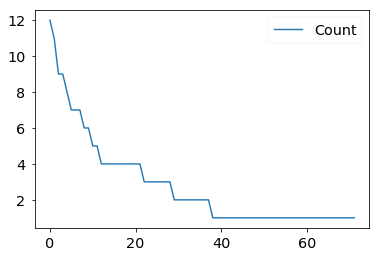

In [160]:
# See the long tail of low frequency doctrines
instance_distributions.plot()

In [139]:
instance_distributions.describe().quantile(np.arange(0.1, 1.1, 0.1))

,cnt
0.1,1.000000
0.2,1.400000
0.3,2.057102
0.4,2.456814
0.5,2.709120
0.6,3.077778
0.7,3.884722
0.8,8.800000
0.9,30.000000
1.0,72.000000


### Uniques and shared [TODO: THIS SECTION IS NOT WORKING YET!!!]


In [93]:
def count_unique_doctrines():
    q = ("MATCH (a:Author)--(t:Text)--(:Question)--(i:Instance)--(d:Doctrine) "
         "WITH collect(distinct a) as authors, d "
         "WHERE size(authors) = 1 "
         "UNWIND authors as author "
         "return count(distinct d) as cnt, author.name as name")
    return {d['name']: d['cnt'] for d in graph.run(q).data()}

# Example
unique = count_unique_doctrines()

In [94]:
def count_shared_doctrines(name):
    q = ("MATCH (a:Author)--(:Text)--(:Question)--(i:Instance)--(d:Doctrine) "
         "MATCH (d)--(:Instance)--(:Question)--(:Text)--(a2:Author) "
         "WHERE (a) <> (a2) "
         "return count(distinct d) as cnt, a.name as name")
    return {d['name']: d['cnt'] for d in graph.run(q).data()}

# Example
shared = count_shared_doctrines('John of Jandun')

In [95]:
def unique_to_shared_proportion(name, unique_dict, shared_dict):
    unique = unique_dict.get(name, 0)
    shared = shared_dict.get(name, 0)
    try:
        return unique / (unique + shared)
    except ZeroDivisionError:
        return 0
    
# Example
unique_to_shared_proportion('John of Jandun', unique, shared)

0.3939393939393939

Now let's get the values of these for all the commentators and put them into a matrix.

In [100]:
def unique_shared_doctrines_all(authors, unique_dict, shared_dict):
    d = {}
    for a in authors:
        unique = unique_dict.get(a, 0)
        shared = shared_dict.get(a, 0)
        prop = unique_to_shared_proportion(a, unique_dict, shared_dict)
        
        d[a] = [unique, shared, unique + shared, round(prop, 2)]
    return d

# Example
m = unique_shared_doctrines_all(author_names, unique, shared)

Put this in a DataFrame and sort according to most unique.

In [104]:
df = pd.DataFrame(m, index=['Unique', 'Shared', 'Sum', 'Proportion'])
df = df.T.sort_values(by='Proportion', ascending=False)
df[['Unique', 'Shared', 'Sum']] = df[['Unique', 'Shared', 'Sum']].astype(int)
df

,Unique,Shared,Sum,Proportion
Adam Whitby,2,1,3,0.67
Anonymus Digby 55,5,4,9,0.56
John of Jandun,13,20,33,0.39
Siger of Brabant,2,6,8,0.25
Radulphus Brito,7,23,30,0.23
Anonymus Bazan,3,17,20,0.15
Anonymus Assisi,1,14,15,0.07
Simon of Faversham,1,13,14,0.07
Henric de la Wyle,1,15,16,0.06
John Dinsdale,1,18,19,0.05


In [106]:
# The sums?
df[['Unique', 'Shared', 'Sum']].sum()

Unique     36
Shared    143
Sum       179
dtype: int64

Notice that these numbers are not identical to the sums above. A unique doctrine is a doctrine that has at least one instantiation by exactly one author (i.e. he may use it more than once), while a shared doctrine has at least one instantiation two or more authors. 

This means that the number is a combination of doctrines and instantiations, and is therefore not identical to the separate doctrine and instance sums above. Any correspondence between the two is coincidental.

In [131]:
# Statistical summary
df.describe()

,Unique,Shared,Sum,Proportion
count,11.000000,11.000000,11.000000,11.000000
mean,3.272727,13.000000,16.272727,0.227273
std,3.823373,6.855655,9.012113,0.223656
min,0.000000,1.000000,3.000000,0.000000
25%,1.000000,9.000000,10.500000,0.065000
50%,2.000000,14.000000,15.000000,0.150000
75%,4.000000,17.500000,19.500000,0.320000
max,13.000000,23.000000,33.000000,0.670000


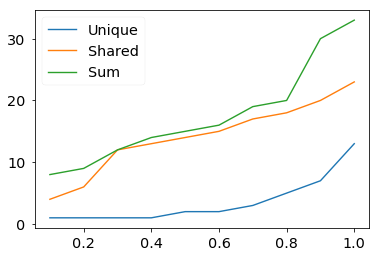

In [132]:
# Plot of the decentiles of unique, shared and sums
df[['Unique', 'Shared', 'Sum']].quantile(np.arange(0.1, 1.1, 0.1)).plot()

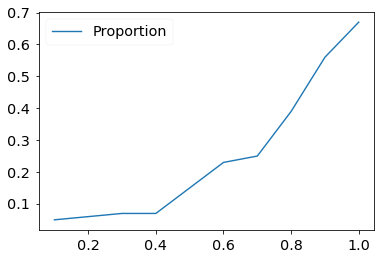

In [133]:
# Plot of the decentiles of the unique-shared proportions
df[['Proportion']].quantile(np.arange(0.1, 1.1, 0.1)).plot()

### Proportional distribution matrices

#### Determinations

In [461]:
def proportion_shared_determination_doctrines(name):
    q = ("MATCH (a1:Author {name:'%s'})--(:Text)--(:Question)--(ia:Instance)--(d:Doctrine) "
         "WHERE NOT EXISTS(ia.type) OR ia.type = 'Conclusion' "
         "MATCH (a2:Author)--(:Text)--(:Question)--(ib:Instance)--(d) "
         "WHERE NOT EXISTS(ib.type) OR ib.type = 'Conclusion' " 
         "MATCH (a1)--(:Text)--(:Question)--(i1:Instance)--(d1:Doctrine) "
         "WHERE NOT EXISTS(i1.type) OR i1.type = 'Conclusion' "
         "MATCH (a2)--(:Text)--(:Question)--(i2:Instance)--(d2:Doctrine) "
         "WHERE NOT EXISTS(i2.type) OR i2.type = 'Conclusion' "
         "RETURN a2.name as name, (toFloat(count(distinct d)) / count(distinct d1)) * (toFloat(count(distinct d)) / count(distinct d2)) as proportion" % name)
    return {d['name']: d['proportion'] for d in graph.run(q).data()}

proportion_shared_determination_doctrines('Siger of Brabant')

{'John of Jandun': 0.03571428571428571, 'Siger of Brabant': 1.0}

In [464]:
def build_matrix(authors, docfunc):
    matrix = {}
    for author in authors:
        matrix[author] = []
        values = docfunc(author)
        for name in authors:
            if name in values:
                matrix[author].append(values[name])
            else:
                matrix[author].append(0)
    return matrix

d = build_matrix(author_names, docfunc=proportion_shared_determination_doctrines)        

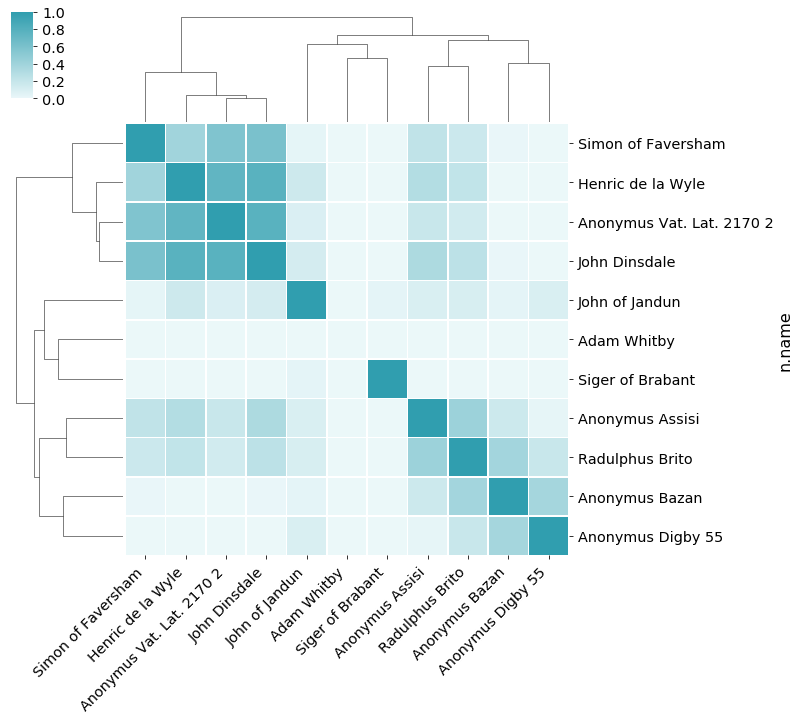

In [475]:
doctrine_frame = pd.DataFrame(d, index=author_names)

# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), as_cmap=True, input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(doctrine_frame, cmap=cmap, linewidths=.5, row_cluster=True)
for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


#### Rationes

In [466]:
def proportion_shared_rationes_doctrines(name):
    q = ("MATCH (a1:Author {name:'%s'})--(:Text)--(:Question)--(ia:Instance)--(d:Doctrine) "
         "WHERE ia.type = 'Attack' or ia.type = 'Refutation' "
         "MATCH (a2:Author)--(:Text)--(:Question)--(ib:Instance)--(d) "
         "WHERE ib.type = 'Attack' or ib.type = 'Refutation' " 
         "MATCH (a1)--(:Text)--(:Question)--(i1:Instance)--(d1:Doctrine) "
         "WHERE i1.type = 'Attack' or i1.type = 'Refutation' "
         "MATCH (a2)--(:Text)--(:Question)--(i2:Instance)--(d2:Doctrine) "
         "WHERE i2.type = 'Attack' or i2.type = 'Refutation' "
         "RETURN a2.name as name, (toFloat(count(distinct d)) / count(distinct d1)) * (toFloat(count(distinct d)) / count(distinct d2)) as proportion" % name)
    return {d['name']: d['proportion'] for d in graph.run(q).data()}

proportion_shared_rationes_doctrines('John of Jandun')

{'Anonymus Bazan': 0.17948717948717946,
 'Anonymus Digby 55': 0.027210884353741492,
 'Anonymus Vat. Lat. 2170 2': 0.007936507936507936,
 'Henric de la Wyle': 0.004761904761904762,
 'John Dinsdale': 0.015873015873015872,
 'John of Jandun': 1.0,
 'Radulphus Brito': 0.1372549019607843,
 'Siger of Brabant': 0.047619047619047616,
 'Simon of Faversham': 0.006802721088435373}

In [467]:
rationes_matrix = build_matrix(author_names, docfunc=proportion_shared_rationes_doctrines)

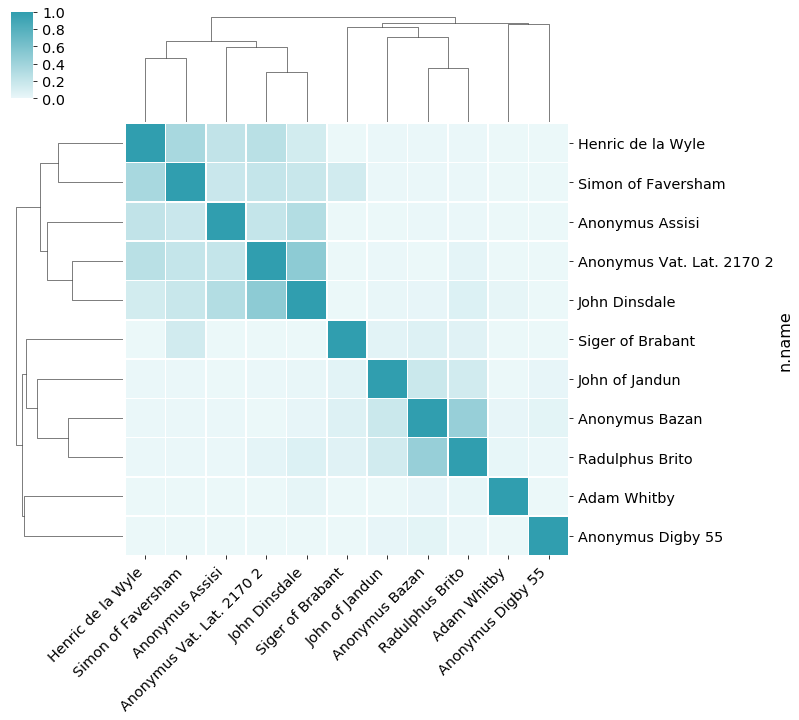

In [470]:
rationes_frame = pd.DataFrame(rationes_matrix, index=author_names)

# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), as_cmap=True, input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(rationes_frame, cmap=cmap, linewidths=.5, row_cluster=True)
for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### All doctrines

In [472]:
def proportion_shared_doctrines(name):
    q = ("MATCH (a1:Author {name:'%s'})--(:Text)--(:Question)--(ia:Instance)--(d:Doctrine) "
         "MATCH (a2:Author)--(:Text)--(:Question)--(ib:Instance)--(d) "
         "MATCH (a1)--(:Text)--(:Question)--(i1:Instance)--(d1:Doctrine) "
         "MATCH (a2)--(:Text)--(:Question)--(i2:Instance)--(d2:Doctrine) "
         "RETURN a2.name as name, (toFloat(count(distinct d)) / count(distinct d1)) * (toFloat(count(distinct d)) / count(distinct d2)) as proportion" % name)
    return {d['name']: d['proportion'] for d in graph.run(q).data()}

proportion_shared_doctrines('John of Jandun')

{'Anonymus Assisi': 0.050505050505050504,
 'Anonymus Bazan': 0.10207336523125997,
 'Anonymus Digby 55': 0.030303030303030304,
 'Anonymus Vat. Lat. 2170 2': 0.06313131313131314,
 'Henric de la Wyle': 0.12121212121212122,
 'John Dinsdale': 0.07814992025518341,
 'John of Jandun': 1.0,
 'Radulphus Brito': 0.1707070707070707,
 'Siger of Brabant': 0.0404040404040404,
 'Simon of Faversham': 0.07792207792207792}

In [473]:
all_matrix = build_matrix(author_names, docfunc=proportion_shared_doctrines)

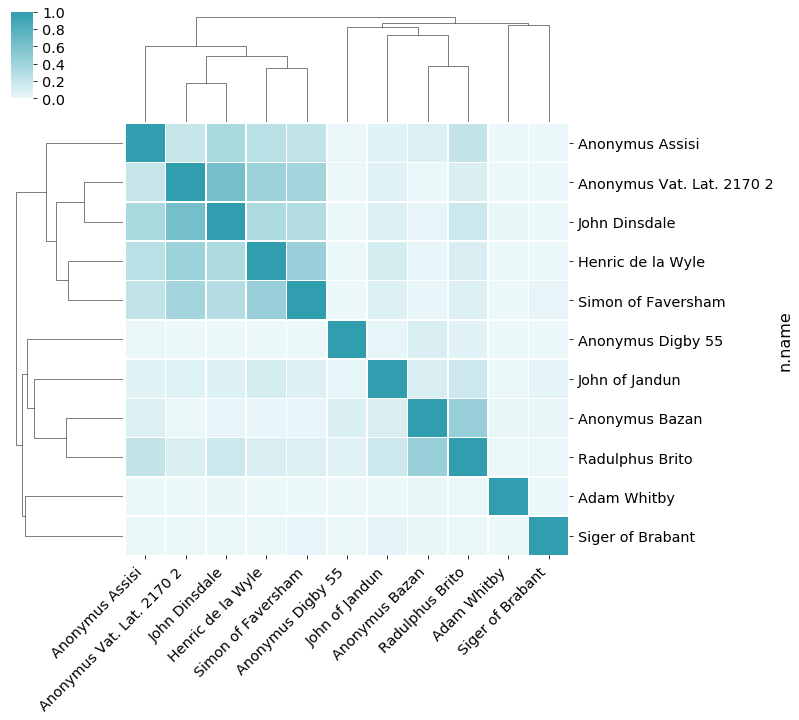

In [474]:
all_frame = pd.DataFrame(all_matrix, index=author_names)

# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), as_cmap=True, input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(all_frame, cmap=cmap, linewidths=.5, row_cluster=True)
for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Which conclusions?

In [126]:
q = ("match (d:Doctrine)-[:OF]-(i:Instance {type:'Conclusion'})--(:Question)--(:Text)--(a:Author)"
     "return distinct d.description as conclusions, collect(distinct a.name) as names, count(distinct i) as uses "
     "order by uses desc")
graph.run(q).to_table()

conclusions,names,uses
Self-knowledge through external species,"['Anonymus Vat. Lat. 2170 2', 'Anonymus Assisi', 'John Dinsdale', 'Henric de la Wyle', 'John of Jandun', 'Simon of Faversham']",6
The intellect is self-intelligible,"['Anonymus Bazan', 'Anonymus Digby 55', 'John of Jandun']",4
The intellect is intelligible,"['Anonymus Bazan', 'Anonymus Assisi', 'Radulphus Brito']",3
Agent intellect known through its products,"['Anonymus Bazan', 'Radulphus Brito']",2
The intellect knows its own power,['Radulphus Brito'],1
The intellect can observe its own activity,['Radulphus Brito'],1
The agent intellect can be understood by the possible intellect,['Anonymus Bazan'],1


Which attacking rationes?

In [146]:
q = ("match (d:Doctrine)<-[:OF]-(i:Instance {type:'Attack'})<-[:HAS]-(q:Question)--(:Text)--(a:Author)"
     "WHERE (q)-[:HAS]->(i)"
     "return distinct d.description, count(distinct i) as uses, collect(distinct a.name) as users "
     "order by length(users) desc")
graph.run(q).to_table()

d.description,uses,users
Identity of knower and known in immaterial substances,5,"['Anonymus Vat. Lat. 2170 2', 'Anonymus Assisi', 'John Dinsdale', 'Henric de la Wyle', 'Simon of Faversham']"
Essential self-knowledge in separate intelligences,5,"['Anonymus Vat. Lat. 2170 2', 'Anonymus Assisi', 'John Dinsdale', 'Henric de la Wyle', 'Simon of Faversham']"
Intellect not available to sense perception,7,"['Anonymus Bazan', 'Henric de la Wyle', 'John of Jandun', 'Radulphus Brito']"
Mover and moved,4,"['Anonymus Bazan', 'Anonymus Digby 55', 'John of Jandun', 'Radulphus Brito']"
No abstraction of the intellect,4,"['Adam Whitby', 'Anonymus Bazan', 'John Dinsdale', 'Radulphus Brito']"
All knowledge must be based on sense perception,4,"['Anonymus Bazan', 'John of Jandun', 'Radulphus Brito', 'Siger of Brabant']"
Knowing the act of the intellect risks infinite regress,4,"['Anonymus Vat. Lat. 2170 2', 'John Dinsdale', 'John of Jandun', 'Radulphus Brito']"
Analogy with sense and sensation,4,"['Anonymus Bazan', 'John of Jandun', 'Radulphus Brito']"
Intellect not its own proper object of knowledge,2,"['Anonymus Bazan', 'Radulphus Brito']"
Self-knowledge by innate species,2,"['Henric de la Wyle', 'Simon of Faversham']"


Shared doctrines

In [147]:
def count_unique_doctrines(name):
    q = ("MATCH (a:Author {name:'%s'})--(:Text)--(:Question)--(i:Instance)--(d:Doctrine) "
         "WHERE NOT (i)--(d)--(:Instance) "
         "return count(distinct d)" % name)
    try:
        return graph.run(q).evaluate()
    except TypeError:
        return 0

# Example
count_unique_doctrines('John of Jandun')

7

In [148]:
def count_shared_doctrines(name):
    q = ("MATCH (a:Author {name:'%s'})--(:Text)--(:Question)--(i:Instance)--(d:Doctrine) "
         "WHERE (i)--(d)--(:Instance) "
         "return count(distinct d)" % name)
    try:
        return graph.run(q).evaluate()
    except TypeError:
        return 0

# Example
count_shared_doctrines('John of Jandun')

25

Get a path of specific combinations
This matches supporting to a level of 8 nodes.
```
match (:Conclusion)-[:OF]->(dc:Doctrine)
call apoc.path.expand(dc, "<SUPPORTS,<SUPPORTS|<IMPLIES|OF>", "Instance|Doctrine", 1, 8) yield path as pp
return pp
```

In [150]:
def count_unique_positive_doctrines(name):
    q = ("MATCH (i2:Instance) "
         "MATCH (a:Author {name:'%s'})--(:Text)--(q:Question)--(i:Instance)--(d:Doctrine) "
         "WHERE (i)-[:SUPPORTS]->(:Doctrine)<-[:OF]-(i2) "
         "AND NOT (i)--(d)--(:Instance) "
         "AND (q)-[:HAS]-(i2)"
         "return count(distinct d)" % name)
    try:
        return graph.run(q).evaluate()
    except TypeError:
        return 0

# Example
count_unique_positive_doctrines('John of Jandun')

1

# Potential problems


- Anon. Bazan has registered instance of attack on Doctrine "Intelligibility requires actuality". Does he have that?
- Radulphus Brito has registered instance of attack on Doctrine "Intelligibility requires actuality". Does he have that?